## Step 0: Import libraries and dataset


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Descriptive analysis

In [1]:
dataset=pd.read_csv('BlackFriday2.csv')
dataset.head()

NameError: name 'pd' is not defined

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.head(20)

## Step 2: Exploratory Data Analysis

<AxesSubplot:>

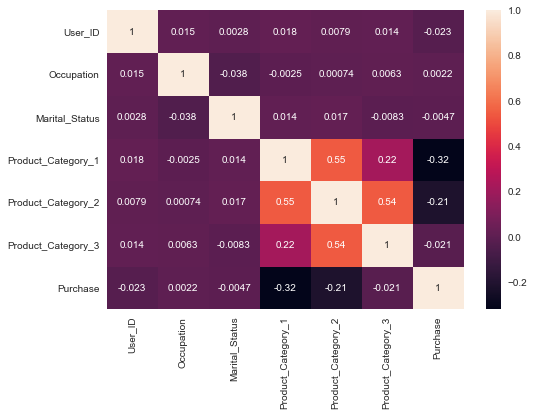

In [45]:
#At this stage, I will exploratory data analysis by visualising the data, in particular, by visualising the statistical relationship between the different variables.

#Exploratory data analysis supported by data visualisations.
sns.heatmap(
    dataset.corr(),
    annot=True
)

c:\users\adarsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


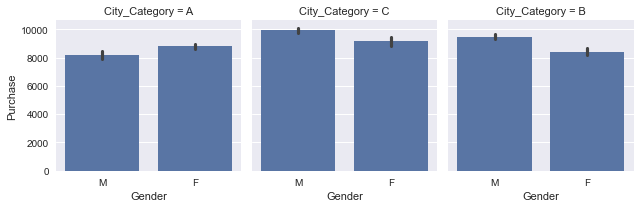

In [46]:
#First insight would be that most of the purchase is done between 5000-10000.
#Next important insight, would be the occupations that lead to highest purchases. In this case, it would be occupation 4, listed in the dataset, closely followed that by 0 and 7.
#One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as they more likely to spend within the above purchase range.

#To get a better understanding, we will now analyse the purchase habits across the different city categories.

g = sns.FacetGrid(dataset,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

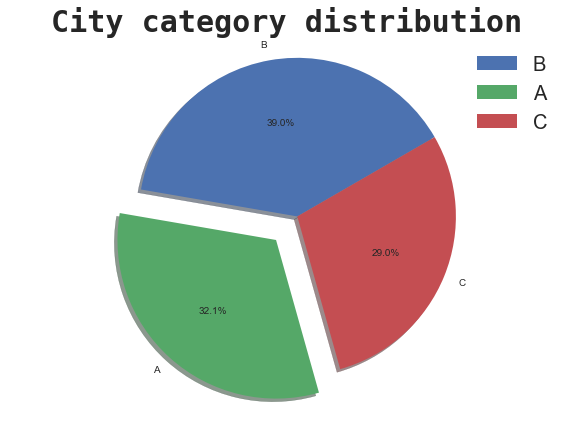

In [47]:
# Creating a pie chart for 'City Category'
city = dataset['City_Category'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

## Step 3: Data preprocessing

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset.iloc[:, 9:11].values)
dataset.iloc[:,9:11] = imputer.transform(dataset.iloc[:, 9:11].values)
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10996 non-null  int64  
 1   Product_ID                  10996 non-null  object 
 2   Gender                      10996 non-null  object 
 3   Age                         10996 non-null  object 
 4   Occupation                  10996 non-null  int64  
 5   City_Category               10996 non-null  object 
 6   Stay_In_Current_City_Years  10996 non-null  object 
 7   Marital_Status              10996 non-null  int64  
 8   Product_Category_1          10996 non-null  int64  
 9   Product_Category_2          10996 non-null  float64
 10  Product_Category_3          10996 non-null  float64
 11  Purchase                    10996 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.0+ MB


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10996 non-null  int64  
 1   Product_ID                  10996 non-null  object 
 2   Gender                      10996 non-null  object 
 3   Age                         10996 non-null  object 
 4   Occupation                  10996 non-null  int64  
 5   City_Category               10996 non-null  object 
 6   Stay_In_Current_City_Years  10996 non-null  object 
 7   Marital_Status              10996 non-null  int64  
 8   Product_Category_1          10996 non-null  int64  
 9   Product_Category_2          10996 non-null  float64
 10  Product_Category_3          10996 non-null  float64
 11  Purchase                    10996 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.0+ MB


In [50]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.779873,12.812293,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.779873,12.812293,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.812293,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.779873,12.812293,7969


##  Feature extraction

In [51]:
#Dropping the columns that intuitiey should not imapact the purchase outcome, i.e. User_ID and Product ID.
dataset.drop(['User_ID','Product_ID'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      10996 non-null  object 
 1   Age                         10996 non-null  object 
 2   Occupation                  10996 non-null  int64  
 3   City_Category               10996 non-null  object 
 4   Stay_In_Current_City_Years  10996 non-null  object 
 5   Marital_Status              10996 non-null  int64  
 6   Product_Category_1          10996 non-null  int64  
 7   Product_Category_2          10996 non-null  float64
 8   Product_Category_3          10996 non-null  float64
 9   Purchase                    10996 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 859.2+ KB


In [52]:
#There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms can be run later.
dataset['Age']=(dataset['Age'].str.strip('+'))
dataset['Stay_In_Current_City_Years']=(dataset['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [53]:
dataset.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.779873,12.812293,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.779873,12.812293,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.812293,1057
4,M,55,16,C,4.0,0,8,9.779873,12.812293,7969
5,M,26-35,15,A,3.0,0,1,2.000000,12.812293,15227
6,M,46-50,7,B,2.0,1,1,8.000000,17.000000,19215
7,M,46-50,7,B,2.0,1,1,15.000000,12.812293,15854
8,M,46-50,7,B,2.0,1,1,16.000000,12.812293,15686
9,M,26-35,20,A,1.0,1,8,9.779873,12.812293,7871


### Creating a train test split

In [54]:
#Having listed down the insights from each step above, let us now move to the next stage of the project, i.e data modelling and predication of sales

#Dividing the data into test and train datasets
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
X_train

array([['F', '18-25', 9, ..., 5, 8.0, 12.812292859294969],
       ['F', '36-45', 14, ..., 3, 4.0, 12.0],
       ['F', '18-25', 12, ..., 8, 14.0, 12.812292859294969],
       ...,
       ['M', '18-25', 4, ..., 5, 9.779873366563384, 12.812292859294969],
       ['M', '18-25', 18, ..., 8, 9.779873366563384, 12.812292859294969],
       ['M', '18-25', 11, ..., 4, 5.0, 12.812292859294969]], dtype=object)

### Feature Scaling

In [56]:
#For X_rrain and X_test, there are categorical variables, which need to be encoded before they can be incorporated into the data model. We will convert each of the variable step by step and cross check our results.
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])

In [57]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])

In [58]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])

In [59]:
X_train

array([[0, 1, 9, ..., 5, 8.0, 12.812292859294969],
       [0, 3, 14, ..., 3, 4.0, 12.0],
       [0, 1, 12, ..., 8, 14.0, 12.812292859294969],
       ...,
       [1, 1, 4, ..., 5, 9.779873366563384, 12.812292859294969],
       [1, 1, 18, ..., 8, 9.779873366563384, 12.812292859294969],
       [1, 1, 11, ..., 4, 5.0, 12.812292859294969]], dtype=object)

In [60]:
labelencoder_X_test = LabelEncoder()
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])

In [61]:
X_test-

array([[0, 3, 8, ..., 16, 9.779873366563384, 12.812292859294969],
       [1, 2, 17, ..., 1, 2.0, 14.0],
       [1, 2, 0, ..., 8, 9.779873366563384, 12.812292859294969],
       ...,
       [1, 2, 0, ..., 1, 2.0, 5.0],
       [0, 2, 20, ..., 8, 9.779873366563384, 12.812292859294969],
       [1, 4, 3, ..., 1, 5.0, 12.0]], dtype=object)

In [62]:
#Having encoded the features, in the next step we will scale all the features to avoid issues due to different measurement scales.
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [63]:
X_train

array([[-1.79294791, -1.02343166,  0.08086802, ..., -0.07564068,
        -0.4223487 ,  0.00611321],
       [-1.79294791,  0.44858287,  0.8236783 , ..., -0.61921534,
        -1.37939844, -0.35820779],
       [-1.79294791, -1.02343166,  0.52655419, ...,  0.73972132,
         1.01322593,  0.00611321],
       ...,
       [ 0.55774069, -1.02343166, -0.66194226, ..., -0.07564068,
         0.00350814,  0.00611321],
       [ 0.55774069, -1.02343166,  1.41792653, ...,  0.73972132,
         0.00350814,  0.00611321],
       [ 0.55774069, -1.02343166,  0.37799213, ..., -0.34742801,
        -1.14013601,  0.00611321]])

## Step 4: Data Modelling

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
Y_pred_lin_reg = lin_reg.predict(X_test)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [66]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
Y_pred_dec = dec_tree.predict(X_test)

In [67]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()
ran_for.fit(X_train, y_train)
Y_pred_ran_for = ran_for.predict(X_test)

In [68]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

## Step 5: Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, Y_pred_lin_reg))
print("\nKNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_knn)))
print("R2 score:", r2_score(y_test, Y_pred_knn))
print("\nDecision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_dec)))
print("R2 score:", r2_score(y_test, Y_pred_dec))
print("\nRandom forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(y_test, Y_pred_ran_for))

Linear Regression: 
RMSE: 4625.780159967936
R2 score: 0.10028039310444159

KNN regression: 
RMSE: 4423.937108477429
R2 score: 0.1770847790129585

Decision tree regression: 
RMSE: 3895.3233541075106
R2 score: 0.36199477422707516

Random forest regression: 
RMSE: 3119.4016477836662
R2 score: 0.5908525949392942


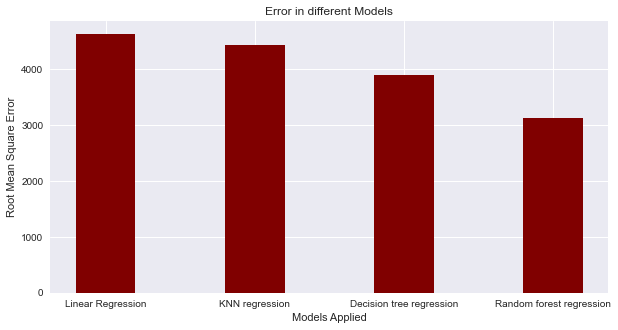

In [71]:
data = {'Linear Regression':np.sqrt(mean_squared_error(y_test, Y_pred_lin_reg)), 'KNN regression':np.sqrt(mean_squared_error(y_test, Y_pred_knn)), 'Decision tree regression':np.sqrt(mean_squared_error(y_test, Y_pred_dec)),
        'Random forest regression':np.sqrt(mean_squared_error(y_test, Y_pred_ran_for))}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models Applied")
plt.ylabel("Root Mean Square Error")
plt.title("Error in different Models")
plt.show()

## Model Output

In [109]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [73]:
y_test

array([16481, 19073,  7802, ..., 11920,  8044, 12043], dtype=int64)

In [74]:
y_pred

array([14457.57683333, 14929.18245238,  7051.86194709, ...,
       13769.71833333,  5220.43211916, 15066.19666667])

In [75]:
y_pred.shape

(2200,)

In [76]:
print("\nRandom forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(y_test, Y_pred_ran_for))


Random forest regression: 
RMSE: 3119.4016477836662
R2 score: 0.5908525949392942


In [77]:
X_test

array([[-1.84629836,  0.43261022, -0.06358014, ...,  2.91865409,
        -0.01427284, -0.0245643 ],
       [ 0.54162427, -0.3109386 ,  1.27994887, ..., -1.19704478,
        -1.90843616,  0.510805  ],
       [ 0.54162427, -0.3109386 , -1.25782814, ...,  0.72361469,
        -0.01427284, -0.0245643 ],
       ...,
       [ 0.54162427, -0.3109386 , -1.25782814, ..., -1.19704478,
        -1.90843616, -3.54602313],
       [-1.84629836, -0.3109386 ,  1.72779187, ...,  0.72361469,
        -0.01427284, -0.0245643 ],
       [ 0.54162427,  1.17615904, -0.80998514, ..., -1.19704478,
        -1.1780271 , -0.39071236]])

In [110]:
val = [[0,52,9,1,1.0,0,5,8.00,14.00]]

In [111]:
pred = regressor.predict(val)

In [112]:
pred

array([2419.56483333])